In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 
import tensorflow as tf

In [13]:
directorio=r'C:\Users\Nicole\DataScience\PerrosGatos'
training=['training_set\\training_set\cats','training_set\\training_set\dogs']
test=['test_set\\test_set\\cats','test_set\\test_set\\dogs']

In [14]:
talla=100
data=[]
for i in training:
    archivo=os.path.join(directorio,i)
    label=training.index(i)
    #print(archivo)
    for imagen in os.listdir(archivo):
        imagen_path=os.path.join(archivo,imagen)
        imagen_arr=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
        try:
            imagen_arr=cv2.resize(imagen_arr,(talla,talla))
            data.append([imagen_arr,label])
        except Exception as e:
            print(str(e))
        #print(imagen_path)
        #plt.imshow(imagen_arr,cmap=plt.cm.binary)
        #plt.show()
        #break


OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [15]:
len(data)

8005

In [16]:
data[0]

[array([[ 43,  44,  43, ...,  94, 183, 193],
        [ 40,  37,  38, ..., 103, 177, 194],
        [ 43,  37,  40, ...,  91, 174, 195],
        ...,
        [ 21,  20,  20, ...,  84,  73,  41],
        [ 24,  18,  21, ...,  59,  39,  30],
        [ 29,  20,  24, ...,  89,  19,  36]], dtype=uint8),
 0]

In [17]:
random.shuffle(data)

In [18]:
X_train=[]
Y_train=[]
curlab=data[0][1]
for imagenes, labels in data:
    
    X_train.append(imagenes)
    Y_train.append(labels)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [19]:
X_train=tf.keras.utils.normalize(X_train,axis=1)

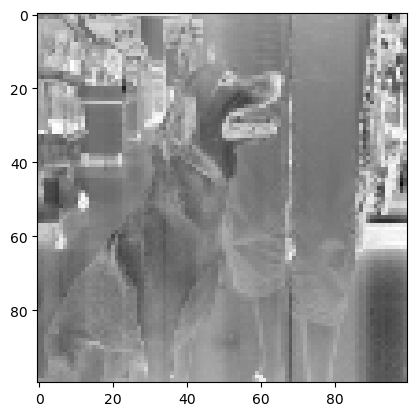

1


In [20]:
plt.imshow(X_train[100],cmap=plt.cm.binary)
plt.show()
print(Y_train[100])

In [21]:
modelo=tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Flatten(input_shape=(100,100)))
modelo.add(tf.keras.layers.Dense(128,activation='relu'))
modelo.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 2s 6ms/step - loss: 0.7103 - accuracy: 0.5253
Epoch 2/5
251/251 [==============================] - 2s 6ms/step - loss: 0.6844 - accuracy: 0.5542
Epoch 3/5
251/251 [==============================] - 2s 6ms/step - loss: 0.6700 - accuracy: 0.5895
Epoch 4/5
251/251 [==============================] - 2s 6ms/step - loss: 0.6667 - accuracy: 0.5936
Epoch 5/5
251/251 [==============================] - 2s 7ms/step - loss: 0.6592 - accuracy: 0.6030


In [22]:
data2=[]
for i in test:
    archivo=os.path.join(directorio,i)
    label=test.index(i)
    #print(archivo)
    for imagen in os.listdir(archivo):
        imagen_path=os.path.join(archivo,imagen)
        imagen_arr=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
        try:
            imagen_arr=cv2.resize(imagen_arr,(talla,talla))
            data2.append([imagen_arr,label])
        except Exception as e:
            print(str(e))

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [23]:
X_test=[]
Y_test=[]
for imagenes, labels in data2:
    X_test.append(imagenes)
    Y_test.append(labels)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [24]:
modelo.evaluate(X_test,Y_test)

64/64 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5991


[0.6637474894523621, 0.5991102457046509]

In [25]:
X_train=X_train.reshape(-1, 100, 100,1)
X_test=X_test.reshape(-1, 100, 100,1)

In [26]:
modelo2=tf.keras.models.Sequential()
modelo2.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
modelo2.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo2.add(tf.keras.layers.Flatten())
modelo2.add(tf.keras.layers.Dense(128,activation='relu', input_shape=(100,100)))          
modelo2.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo2.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 55s 218ms/step - loss: 0.6887 - accuracy: 0.5736
Epoch 2/5
251/251 [==============================] - 53s 210ms/step - loss: 0.6229 - accuracy: 0.6592
Epoch 3/5
251/251 [==============================] - 50s 198ms/step - loss: 0.5417 - accuracy: 0.7312
Epoch 4/5
251/251 [==============================] - 45s 180ms/step - loss: 0.4586 - accuracy: 0.7898
Epoch 5/5
251/251 [==============================] - 46s 184ms/step - loss: 0.3634 - accuracy: 0.8403


In [27]:
modelo2.evaluate(X_test,Y_test)

64/64 [==============================] - 3s 46ms/step - loss: 0.6106 - accuracy: 0.7133


[0.6106103658676147, 0.7132970690727234]

In [28]:
X_train.shape[1:]

(100, 100, 1)

In [29]:
modelo2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               19669120  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 19,670,018
Trainable params: 19,670,018
Non-trainable params: 0
_________________________________________________________________


In [30]:
modelo2.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 45s 180ms/step - loss: 0.2872 - accuracy: 0.8852
Epoch 2/5
251/251 [==============================] - 46s 184ms/step - loss: 0.2071 - accuracy: 0.9194
Epoch 3/5
251/251 [==============================] - 50s 200ms/step - loss: 0.1482 - accuracy: 0.9482
Epoch 4/5
251/251 [==============================] - 47s 186ms/step - loss: 0.0996 - accuracy: 0.9694
Epoch 5/5
251/251 [==============================] - 49s 193ms/step - loss: 0.0661 - accuracy: 0.9826


In [31]:
modelo2.evaluate(X_test,Y_test)

64/64 [==============================] - 3s 48ms/step - loss: 1.0541 - accuracy: 0.7009


[1.0541166067123413, 0.7009391784667969]

In [32]:
modelo3=tf.keras.models.Sequential()
modelo3.add(tf.keras.layers.Conv2D(100,(5,5),activation='relu'))
modelo3.add(tf.keras.layers.MaxPooling2D((3,3),strides=2))
modelo3.add(tf.keras.layers.Flatten())
modelo3.add(tf.keras.layers.Dense(100,activation='relu', input_shape=(100,100)))          
modelo3.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo3.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 77s 308ms/step - loss: 0.6925 - accuracy: 0.5220
Epoch 2/5
251/251 [==============================] - 77s 306ms/step - loss: 0.6764 - accuracy: 0.5683
Epoch 3/5
251/251 [==============================] - 77s 306ms/step - loss: 0.6515 - accuracy: 0.6220
Epoch 4/5
251/251 [==============================] - 76s 303ms/step - loss: 0.5978 - accuracy: 0.6756
Epoch 5/5
251/251 [==============================] - 79s 315ms/step - loss: 0.5399 - accuracy: 0.7287


In [33]:
modelo3.evaluate(X_test,Y_test)

64/64 [==============================] - 6s 99ms/step - loss: 0.5991 - accuracy: 0.6836


[0.59910649061203, 0.6836381554603577]

In [34]:
modelo3=tf.keras.models.Sequential()
modelo3.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo3.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo3.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo3.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo3.add(tf.keras.layers.Flatten())
modelo3.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(100,100)))          
modelo3.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo3.fit(X_train,Y_train,epochs=4)

Epoch 1/4
251/251 [==============================] - 70s 277ms/step - loss: 0.6930 - accuracy: 0.5207
Epoch 2/4
251/251 [==============================] - 69s 276ms/step - loss: 0.6850 - accuracy: 0.5499
Epoch 3/4
251/251 [==============================] - 69s 274ms/step - loss: 0.6453 - accuracy: 0.6326
Epoch 4/4
251/251 [==============================] - 68s 271ms/step - loss: 0.6084 - accuracy: 0.6756


In [35]:
modelo3.evaluate(X_test,Y_test)

64/64 [==============================] - 4s 56ms/step - loss: 0.6073 - accuracy: 0.6836


[0.6072968244552612, 0.6836381554603577]

In [36]:
modelo5=tf.keras.models.Sequential()
modelo5.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo5.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo5.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo5.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo5.add(tf.keras.layers.Flatten())
modelo5.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(100,100)))
modelo5.add(tf.keras.layers.Dense(20,activation='relu'))
modelo5.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo5.fit(X_train,Y_train,epochs=4)

Epoch 1/4
251/251 [==============================] - 58s 230ms/step - loss: 0.6881 - accuracy: 0.5392
Epoch 2/4
251/251 [==============================] - 61s 242ms/step - loss: 0.6677 - accuracy: 0.5870
Epoch 3/4
251/251 [==============================] - 56s 224ms/step - loss: 0.6293 - accuracy: 0.6521
Epoch 4/4
251/251 [==============================] - 68s 271ms/step - loss: 0.5842 - accuracy: 0.6913


In [37]:
modelo5.evaluate(X_test,Y_test)

64/64 [==============================] - 5s 77ms/step - loss: 0.5986 - accuracy: 0.6935


[0.5985727906227112, 0.6935244798660278]

In [38]:
talla=50
data=[]
for i in training:
    archivo=os.path.join(directorio,i)
    label=training.index(i)
    #print(archivo)
    for imagen in os.listdir(archivo):
        imagen_path=os.path.join(archivo,imagen)
        imagen_arr=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
        try:
            imagen_arr=cv2.resize(imagen_arr,(talla,talla))
            data.append([imagen_arr,label])
        except Exception as e:
            print(str(e))
        #print(imagen_path)
        #plt.imshow(imagen_arr,cmap=plt.cm.binary)
        #plt.show()
        #break

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [39]:
X_train=[]
Y_train=[]
for imagenes, labels in data:
    X_train.append(imagenes)
    Y_train.append(labels)
X_train=np.array(X_train)
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_train=X_train.reshape(-1, 50, 50,1)
Y_train=np.array(Y_train)

In [40]:
data2=[]
for i in test:
    archivo=os.path.join(directorio,i)
    label=test.index(i)
    #print(archivo)
    for imagen in os.listdir(archivo):
        imagen_path=os.path.join(archivo,imagen)
        imagen_arr=cv2.imread(imagen_path,cv2.IMREAD_GRAYSCALE)
        try:
            imagen_arr=cv2.resize(imagen_arr,(talla,talla))
            data2.append([imagen_arr,label])
        except Exception as e:
            print(str(e))

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [41]:
X_test=[]
Y_test=[]
for imagenes, labels in data2:
    X_test.append(imagenes)
    Y_test.append(labels)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test=tf.keras.utils.normalize(X_test,axis=1)
X_test=X_test.reshape(-1, 50, 50,1)


In [42]:
modelo=tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Flatten(input_shape=(50,50)))
modelo.add(tf.keras.layers.Dense(128,activation='relu'))
modelo.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 1s 2ms/step - loss: 0.7000 - accuracy: 0.5114
Epoch 2/5
251/251 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5437
Epoch 3/5
251/251 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.5754
Epoch 4/5
251/251 [==============================] - 1s 3ms/step - loss: 0.6644 - accuracy: 0.5984
Epoch 5/5
251/251 [==============================] - 1s 3ms/step - loss: 0.6580 - accuracy: 0.5995


In [43]:
modelo.evaluate(X_test,Y_test)

64/64 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5912


[0.6680907011032104, 0.5912011861801147]

In [44]:
modelo2=tf.keras.models.Sequential()
modelo2.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
modelo2.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo2.add(tf.keras.layers.Flatten())
modelo2.add(tf.keras.layers.Dense(128,activation='relu', input_shape=(50,50)))          
modelo2.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo2.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 15s 61ms/step - loss: 0.6791 - accuracy: 0.5615
Epoch 2/5
251/251 [==============================] - 16s 64ms/step - loss: 0.6122 - accuracy: 0.6737
Epoch 3/5
251/251 [==============================] - 14s 54ms/step - loss: 0.5657 - accuracy: 0.7162
Epoch 4/5
251/251 [==============================] - 15s 58ms/step - loss: 0.5145 - accuracy: 0.7553
Epoch 5/5
251/251 [==============================] - 13s 53ms/step - loss: 0.4696 - accuracy: 0.7776


In [45]:
modelo2.evaluate(X_test,Y_test)

64/64 [==============================] - 1s 15ms/step - loss: 0.5721 - accuracy: 0.7252


[0.5721471905708313, 0.7251606583595276]

In [46]:
modelo3=tf.keras.models.Sequential()
modelo3.add(tf.keras.layers.Conv2D(100,(5,5),activation='relu'))
modelo3.add(tf.keras.layers.MaxPooling2D((3,3),strides=2))
modelo3.add(tf.keras.layers.Flatten())
modelo3.add(tf.keras.layers.Dense(100,activation='relu', input_shape=(50,50)))          
modelo3.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo3.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 20s 79ms/step - loss: 0.6557 - accuracy: 0.6129
Epoch 2/5
251/251 [==============================] - 23s 91ms/step - loss: 0.5959 - accuracy: 0.6874
Epoch 3/5
251/251 [==============================] - 20s 78ms/step - loss: 0.5504 - accuracy: 0.7183
Epoch 4/5
251/251 [==============================] - 23s 90ms/step - loss: 0.5238 - accuracy: 0.7450
Epoch 5/5
251/251 [==============================] - 18s 72ms/step - loss: 0.4779 - accuracy: 0.7689


In [47]:
modelo3.evaluate(X_test,Y_test)

64/64 [==============================] - 1s 19ms/step - loss: 0.5670 - accuracy: 0.7266


[0.5669519305229187, 0.7266436219215393]

In [48]:
modelo4=tf.keras.models.Sequential()
modelo4.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo4.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo4.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo4.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo4.add(tf.keras.layers.Flatten())
modelo4.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(50,50)))          
modelo4.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo4.fit(X_train,Y_train,epochs=4)

Epoch 1/4
251/251 [==============================] - 14s 57ms/step - loss: 0.6732 - accuracy: 0.5795
Epoch 2/4
251/251 [==============================] - 16s 63ms/step - loss: 0.6291 - accuracy: 0.6545
Epoch 3/4
251/251 [==============================] - 15s 62ms/step - loss: 0.5721 - accuracy: 0.7096
Epoch 4/4
251/251 [==============================] - 16s 64ms/step - loss: 0.5232 - accuracy: 0.7415


In [49]:
modelo4.evaluate(X_test,Y_test)

64/64 [==============================] - 1s 19ms/step - loss: 0.5847 - accuracy: 0.6876


[0.5846783518791199, 0.6875926852226257]

In [50]:
modelo5=tf.keras.models.Sequential()
modelo5.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo5.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo5.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo5.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo5.add(tf.keras.layers.Flatten())
modelo5.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(50,50)))
modelo5.add(tf.keras.layers.Dense(20,activation='relu'))
modelo5.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo5.fit(X_train,Y_train,epochs=4)

Epoch 1/4
251/251 [==============================] - 17s 69ms/step - loss: 0.6845 - accuracy: 0.5367
Epoch 2/4
251/251 [==============================] - 21s 83ms/step - loss: 0.6545 - accuracy: 0.6231
Epoch 3/4
251/251 [==============================] - 20s 79ms/step - loss: 0.6137 - accuracy: 0.6667
Epoch 4/4
251/251 [==============================] - 20s 79ms/step - loss: 0.5710 - accuracy: 0.7019


In [51]:
modelo5.evaluate(X_test,Y_test)

64/64 [==============================] - 1s 18ms/step - loss: 0.5551 - accuracy: 0.7271


[0.5550940632820129, 0.7271379232406616]

In [52]:
talla=50
data=[]
for i in training:
    archivo=os.path.join(directorio,i)
    label=training.index(i)
    #print(archivo)
    for imagen in os.listdir(archivo):
        imagen_path=os.path.join(archivo,imagen)
        imagen_arr=cv2.imread(imagen_path)
        try:
            imagen_arr=cv2.resize(imagen_arr,(talla,talla))
            data.append([imagen_arr,label])
        except Exception as e:
            print(str(e))
        #print(imagen_path)
        #plt.imshow(imagen_arr,cmap=plt.cm.binary)
        #plt.show()
        #break

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [53]:
X_train=[]
Y_train=[]
for imagenes, labels in data:
    X_train.append(imagenes)
    Y_train.append(labels)
X_train=np.array(X_train)
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_train=X_train.reshape(-1, 50, 50,3)
Y_train=np.array(Y_train)

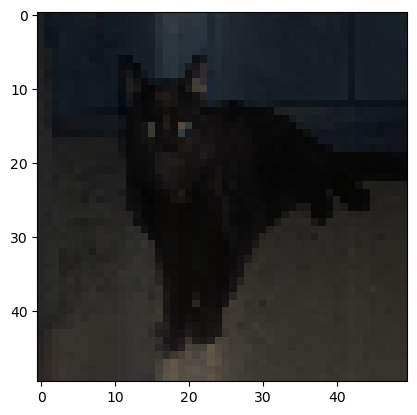

In [54]:
plt.imshow(X_train[10])
plt.show()

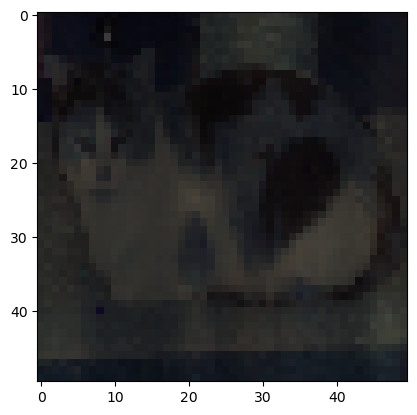

In [55]:
plt.imshow(X_train[100])
plt.show()

In [56]:
data2=[]
for i in test:
    archivo=os.path.join(directorio,i)
    label=test.index(i)
    #print(archivo)
    for imagen in os.listdir(archivo):
        imagen_path=os.path.join(archivo,imagen)
        imagen_arr=cv2.imread(imagen_path)
        try:
            imagen_arr=cv2.resize(imagen_arr,(talla,talla))
            data2.append([imagen_arr,label])
        except Exception as e:
            print(str(e))

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [57]:
X_test=[]
Y_test=[]
for imagenes, labels in data2:
    X_test.append(imagenes)
    Y_test.append(labels)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test=tf.keras.utils.normalize(X_test,axis=1)
X_test=X_test.reshape(-1, 50, 50,3)

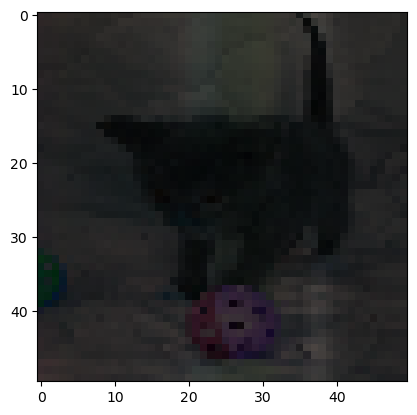

In [58]:
plt.imshow(X_test[100])
plt.show()

In [59]:
modelo=tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Flatten(input_shape=(50,50,3)))
modelo.add(tf.keras.layers.Dense(128,activation='relu'))
modelo.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 1s 5ms/step - loss: 0.7081 - accuracy: 0.5319
Epoch 2/5
251/251 [==============================] - 1s 5ms/step - loss: 0.6871 - accuracy: 0.5397
Epoch 3/5
251/251 [==============================] - 1s 5ms/step - loss: 0.6779 - accuracy: 0.5633
Epoch 4/5
251/251 [==============================] - 1s 5ms/step - loss: 0.6682 - accuracy: 0.5853
Epoch 5/5
251/251 [==============================] - 1s 5ms/step - loss: 0.6593 - accuracy: 0.6079


In [60]:
modelo.evaluate(X_test,Y_test)

64/64 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5937


[0.668903112411499, 0.5936727523803711]

In [61]:
modelo2=tf.keras.models.Sequential()
modelo2.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
modelo2.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo2.add(tf.keras.layers.Flatten())
modelo2.add(tf.keras.layers.Dense(128,activation='relu', input_shape=(50,50,3)))          
modelo2.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo2.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 14s 56ms/step - loss: 0.6509 - accuracy: 0.6231
Epoch 2/5
251/251 [==============================] - 15s 58ms/step - loss: 0.5593 - accuracy: 0.7171
Epoch 3/5
251/251 [==============================] - 16s 64ms/step - loss: 0.4772 - accuracy: 0.7774
Epoch 4/5
251/251 [==============================] - 16s 66ms/step - loss: 0.4044 - accuracy: 0.8187
Epoch 5/5
251/251 [==============================] - 16s 63ms/step - loss: 0.3350 - accuracy: 0.8528


In [62]:
modelo2.evaluate(X_test,Y_test)

64/64 [==============================] - 1s 20ms/step - loss: 0.6029 - accuracy: 0.7346


[0.6028674244880676, 0.7345526218414307]

In [63]:
modelo3=tf.keras.models.Sequential()
modelo3.add(tf.keras.layers.Conv2D(100,(5,5),activation='relu'))
modelo3.add(tf.keras.layers.MaxPooling2D((3,3),strides=2))
modelo3.add(tf.keras.layers.Flatten())
modelo3.add(tf.keras.layers.Dense(100,activation='relu', input_shape=(50,50,3)))          
modelo3.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo3.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 22s 86ms/step - loss: 0.6771 - accuracy: 0.5794
Epoch 2/5
251/251 [==============================] - 22s 86ms/step - loss: 0.6023 - accuracy: 0.6763
Epoch 3/5
251/251 [==============================] - 21s 85ms/step - loss: 0.5599 - accuracy: 0.7127
Epoch 4/5
251/251 [==============================] - 24s 96ms/step - loss: 0.5236 - accuracy: 0.7407
Epoch 5/5
251/251 [==============================] - 24s 96ms/step - loss: 0.4915 - accuracy: 0.7646


In [64]:
modelo3.evaluate(X_test,Y_test)

64/64 [==============================] - 2s 31ms/step - loss: 0.5686 - accuracy: 0.7197


[0.5686213374137878, 0.7197231650352478]

In [65]:
modelo4=tf.keras.models.Sequential()
modelo4.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo4.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo4.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo4.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo4.add(tf.keras.layers.Flatten())
modelo4.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(50,50,3)))          
modelo4.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo4.fit(X_train,Y_train,epochs=4)

Epoch 1/4
251/251 [==============================] - 18s 71ms/step - loss: 0.6837 - accuracy: 0.5528
Epoch 2/4
251/251 [==============================] - 17s 66ms/step - loss: 0.6317 - accuracy: 0.6531
Epoch 3/4
251/251 [==============================] - 17s 68ms/step - loss: 0.5879 - accuracy: 0.7004
Epoch 4/4
251/251 [==============================] - 20s 79ms/step - loss: 0.5345 - accuracy: 0.7385


In [66]:
modelo4.evaluate(X_test,Y_test)

64/64 [==============================] - 2s 29ms/step - loss: 0.5543 - accuracy: 0.7316


[0.5543141961097717, 0.731586754322052]

In [67]:
modelo4.fit(X_train,Y_train,epochs=2)

Epoch 1/2
251/251 [==============================] - 18s 71ms/step - loss: 0.4973 - accuracy: 0.7597
Epoch 2/2
251/251 [==============================] - 21s 86ms/step - loss: 0.4653 - accuracy: 0.7795


In [68]:
modelo4.evaluate(X_test,Y_test)

64/64 [==============================] - 2s 26ms/step - loss: 0.5364 - accuracy: 0.7439


[0.5364069938659668, 0.7439446449279785]

In [69]:
modelo5=tf.keras.models.Sequential()
modelo5.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo5.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo5.add(tf.keras.layers.Conv2D(50,(3,3),activation='relu'))
modelo5.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo5.add(tf.keras.layers.Flatten())
modelo5.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(50,50,3)))
modelo5.add(tf.keras.layers.Dense(20,activation='relu'))
modelo5.add(tf.keras.layers.Dense(2,activation='softmax'))
modelo5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo5.fit(X_train,Y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 20s 81ms/step - loss: 0.6743 - accuracy: 0.5796
Epoch 2/5
251/251 [==============================] - 21s 84ms/step - loss: 0.6054 - accuracy: 0.6785
Epoch 3/5
251/251 [==============================] - 18s 73ms/step - loss: 0.5514 - accuracy: 0.7191
Epoch 4/5
251/251 [==============================] - 17s 68ms/step - loss: 0.4965 - accuracy: 0.7599
Epoch 5/5
251/251 [==============================] - 16s 64ms/step - loss: 0.4647 - accuracy: 0.7803


In [70]:
modelo5.evaluate(X_test,Y_test)

64/64 [==============================] - 1s 16ms/step - loss: 0.5274 - accuracy: 0.7355


[0.5274428129196167, 0.7355412840843201]

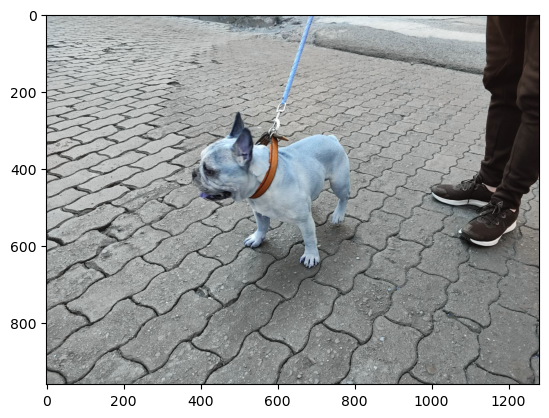

In [71]:
imagen=cv2.imread('Perro1.jpeg')
plt.imshow(imagen)

TypeError: Invalid shape (0, 50, 50, 3) for image data

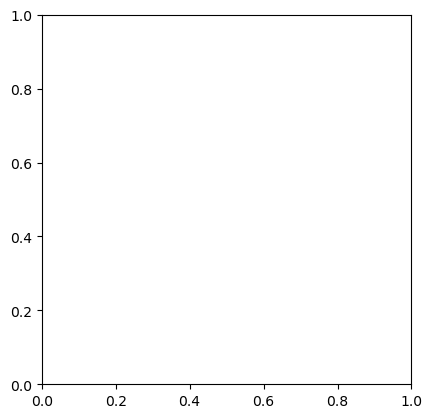

In [72]:
#imagen=tf.keras.utils.normalize(imagen,axis=1)
imagen=cv2.resize(imagen,(50,50),interpolation = cv2.INTER_AREA)
imagen=imagen.reshape(-1,50,50,3)
plt.imshow(imagen[1:])
plt.show()

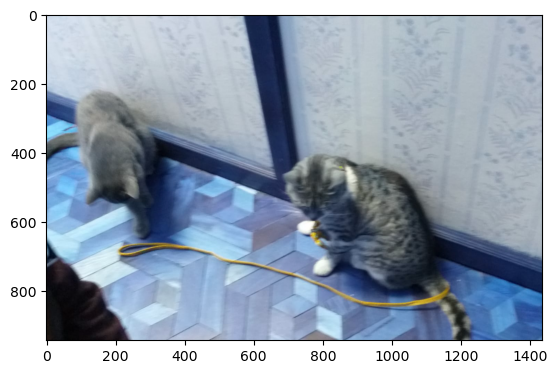

In [84]:
imagen=cv2.imread('Gato1.jpeg')
plt.imshow(imagen)
plt.show()
imagen=cv2.resize(imagen,(50,50),interpolation = cv2.INTER_AREA)
imagen=imagen.reshape(-1,50,50,3)


In [76]:
np.argmax(modelo.predict(imagen))

1

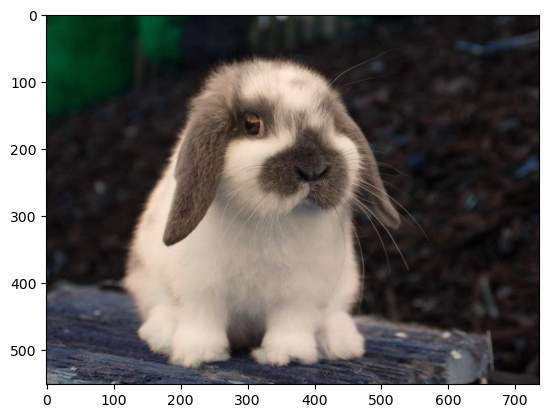

In [78]:
imagen2=cv2.imread('conejo.jpg')
plt.imshow(imagen2)
plt.show()
imagen2=cv2.resize(imagen2,(50,50),interpolation = cv2.INTER_AREA)
imagen2=imagen2.reshape(-1,50,50,3)

In [79]:
np.argmax(modelo.predict(imagen2))

0

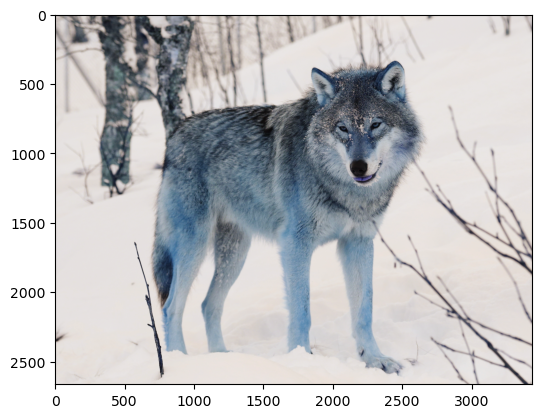

In [81]:
imagen3=cv2.imread('wolf.jpb.jpg')
plt.imshow(imagen3)
plt.show()
imagen3=cv2.resize(imagen3,(50,50),interpolation = cv2.INTER_AREA)
imagen3=imagen3.reshape(-1,50,50,3)

In [82]:
np.argmax(modelo.predict(imagen3))

1

In [85]:
np.argmax(modelo5.predict(imagen))

0

In [86]:
np.argmax(modelo5.predict(imagen))

0

In [87]:
np.argmax(modelo5.predict(imagen3))

1

In [88]:
np.argmax(modelo5.predict(imagen2))

1

In [89]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

170500096/170498071 [==============================] - 62s 0us/step


In [90]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [91]:
etiquetas=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
etiquetas

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

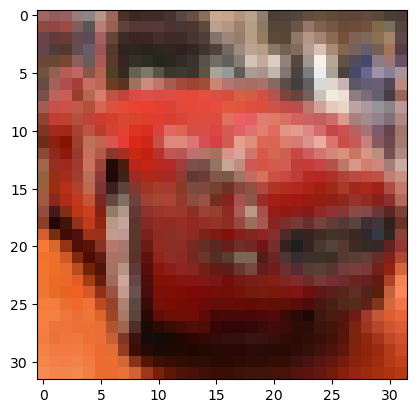

array([1], dtype=uint8)

In [92]:
plt.imshow(x_train[5])
plt.show()
y_train[5]

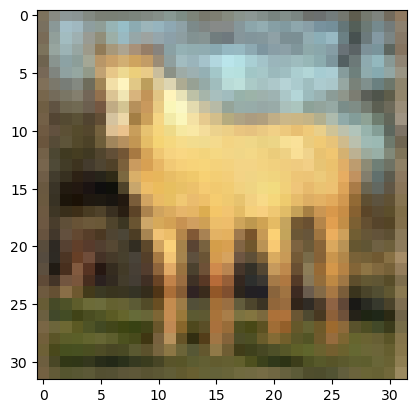

array([7], dtype=uint8)

In [93]:
plt.imshow(x_train[575])
plt.show()
y_train[575]

In [94]:
x_train.shape

(50000, 32, 32, 3)

In [96]:
x_test.shape

(10000, 32, 32, 3)

In [97]:
x_train=x_train/255
x_test=x_test/255

In [98]:
modeloB=tf.keras.models.Sequential()
modeloB.add(tf.keras.layers.Flatten(input_shape=(100,100)))
modeloB.add(tf.keras.layers.Dense(128,activation='relu'))
modeloB.add(tf.keras.layers.Dense(2,activation='softmax'))
modeloB.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modeloB.fit(x_train,y_train,epochs=5)

Epoch 1/5


ValueError: in user code:

    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_35 is incompatible with the layer: expected axis -1 of input shape to have value 10000 but received input with shape [None, 3072]


In [99]:
modelo2conv=tf.keras.models.Sequential()
modelo2conv.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
modelo2conv.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo2conv.add(tf.keras.layers.Flatten())
modelo2conv.add(tf.keras.layers.Dense(100,activation='relu', input_shape=(32,32,3)))          
modelo2conv.add(tf.keras.layers.Dense(10,activation='softmax'))
modelo2conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo2conv.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4354 - accuracy: 0.4901
Epoch 2/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1454 - accuracy: 0.5982
Epoch 3/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0299 - accuracy: 0.6401
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9543 - accuracy: 0.6676
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8881 - accuracy: 0.6914


In [100]:
modelo2conv.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8231 - accuracy: 0.7134
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7695 - accuracy: 0.7314
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7240 - accuracy: 0.7477
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6781 - accuracy: 0.7654
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6265 - accuracy: 0.7815


In [101]:
modelo2conv.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1343 - accuracy: 0.6344


[1.1343166828155518, 0.6344000101089478]

In [102]:
modelo2conv2=tf.keras.models.Sequential()
modelo2conv2.add(tf.keras.layers.Conv2D(32,(4,4),activation='relu'))
modelo2conv2.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo2conv2.add(tf.keras.layers.Conv2D(32,(4,4),activation='relu'))
modelo2conv2.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
modelo2conv2.add(tf.keras.layers.Flatten())
modelo2conv2.add(tf.keras.layers.Dense(100,activation='relu', input_shape=(32,32,3)))          
modelo2conv2.add(tf.keras.layers.Dense(10,activation='softmax'))
modelo2conv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
modelo2conv2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5502 - accuracy: 0.4361
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2526 - accuracy: 0.5556
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1144 - accuracy: 0.6080
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0234 - accuracy: 0.6430
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9527 - accuracy: 0.6667


In [103]:
modelo2conv2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 41s 27ms/step - loss: 0.8968 - accuracy: 0.6864
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8449 - accuracy: 0.7047
Epoch 3/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8021 - accuracy: 0.7198
Epoch 4/5
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7659 - accuracy: 0.7324
Epoch 5/5
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7282 - accuracy: 0.7450


In [104]:
modelo2conv2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9417 - accuracy: 0.6854


[0.9416653513908386, 0.6854000091552734]

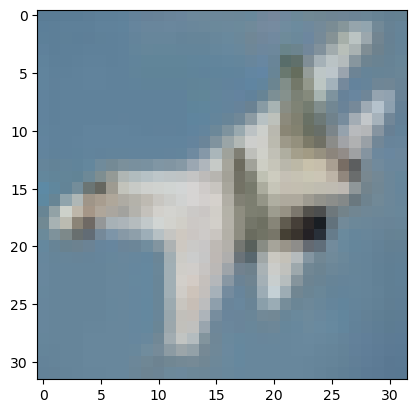

(array([0], dtype=uint8), 0, 8)

In [107]:
plt.imshow(x_test[10])
plt.show()
imagen=x_test[10]
imagen=imagen.reshape((-1,32,32,3))
y_test[10],np.argmax(modelo2conv.predict(imagen)),np.argmax(modelo2conv2.predict(imagen))

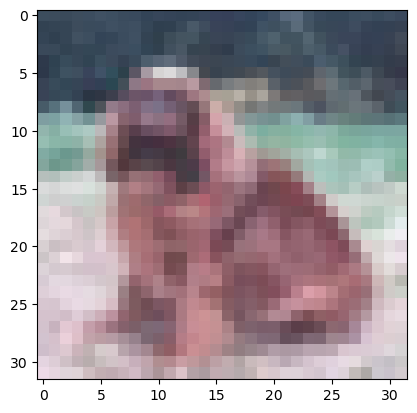

(array([5], dtype=uint8), 5, 2)

In [108]:
plt.imshow(x_test[101])
plt.show()
imagen=x_test[101]
imagen=imagen.reshape((-1,32,32,3))
y_test[101],np.argmax(modelo2conv.predict(imagen)),np.argmax(modelo2conv2.predict(imagen))